In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.precision", 2)
pd.set_option('display.max_columns', None)
# import sweetviz as sw
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import SMOTE

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# import csv
df = pd.read_csv("telco-customer-churn.csv")

In [4]:
# basic information about data set
print("The size of dataset is {}".format(df.shape))
print("There are {} rows  in dataset.".format(df.shape[0]))
print("There are {} columns in dataset.".format(df.shape[1]))

The size of dataset is (7043, 21)
There are 7043 rows  in dataset.
There are 21 columns in dataset.


In [5]:
df.head()# first five

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.tail(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
# make all the column label uniform
df.columns = [x.capitalize() for x in df.columns]

In [8]:
df.head()

,Customerid,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,Onlinebackup,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# There are no duplicate row
duplicate_cell = df[df.duplicated()]
duplicate_cell

,Customerid,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,Onlinebackup,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn


In [10]:
# basic statical information 
df.describe()
# there are three numerical columns and reset are categorial variable

,Seniorcitizen,Tenure,Monthlycharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


In [11]:
"""
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

"""
# check if the datatypes are okay or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customerid        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   Seniorcitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   Phoneservice      7043 non-null   object 
 7   Multiplelines     7043 non-null   object 
 8   Internetservice   7043 non-null   object 
 9   Onlinesecurity    7043 non-null   object 
 10  Onlinebackup      7043 non-null   object 
 11  Deviceprotection  7043 non-null   object 
 12  Techsupport       7043 non-null   object 
 13  Streamingtv       7043 non-null   object 
 14  Streamingmovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperlessbilling  7043 non-null   object 


In [12]:
df.isnull().sum()

Customerid          0
Gender              0
Seniorcitizen       0
Partner             0
Dependents          0
Tenure              0
Phoneservice        0
Multiplelines       0
Internetservice     0
Onlinesecurity      0
Onlinebackup        0
Deviceprotection    0
Techsupport         0
Streamingtv         0
Streamingmovies     0
Contract            0
Paperlessbilling    0
Paymentmethod       0
Monthlycharges      0
Totalcharges        0
Churn               0
dtype: int64

In [13]:
only_phone_custmoer = df[(df["Phoneservice"]=="Yes")& (df["Internetservice"]== 'No')]
only_internet_custmer = df[(df["Internetservice"] == "DSL") | (df["Internetservice"]=="Fiber optic") & (df["Phoneservice"]=="No")]
internet_custmer = df[(df["Internetservice"] == "DSL") | (df["Internetservice"]=="Fiber optic")]
phone_internet_custmer = df[(df["Phoneservice"] == "Yes") & (df["Internetservice"] == "DSL") | (df["Internetservice"]=="Fiber optic")]

In [14]:
# Analysis of customer:
print("The total number of customer in dataset are {}.".format(df.shape[0]))
print("The number of customer having phone and internet service {}".format(phone_internet_custmer.shape[0]))
print("The number pf customer phone services are {}.".format(only_phone_custmoer.shape[0]))
print("The number of customer having internet services {}.".format(internet_custmer.shape[0]))
print("The number pf customer only Internet services are {}.".format(only_internet_custmer.shape[0]))

The total number of customer in dataset are 7043.
The number of customer having phone and internet service 4835
The number pf customer phone services are 1526.
The number of customer having internet services 5517.
The number pf customer only Internet services are 2421.


In [15]:
#Descriptive statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Seniorcitizen,7043.0,0.16,0.37,0.00,0.0,0.00,0.00,1.00
Tenure,7043.0,32.37,24.56,0.00,9.0,29.00,55.00,72.00
Monthlycharges,7043.0,64.76,30.09,18.25,35.5,70.35,89.85,118.75


In [16]:
df.columns

Index(['Customerid', 'Gender', 'Seniorcitizen', 'Partner', 'Dependents',
       'Tenure', 'Phoneservice', 'Multiplelines', 'Internetservice',
       'Onlinesecurity', 'Onlinebackup', 'Deviceprotection', 'Techsupport',
       'Streamingtv', 'Streamingmovies', 'Contract', 'Paperlessbilling',
       'Paymentmethod', 'Monthlycharges', 'Totalcharges', 'Churn'],
      dtype='object')

In [17]:
# The type change
df['Totalcharges'] = pd.to_numeric(df['Totalcharges'],errors='coerce')
df["Totalcharges"] = df["Totalcharges"].astype(float)

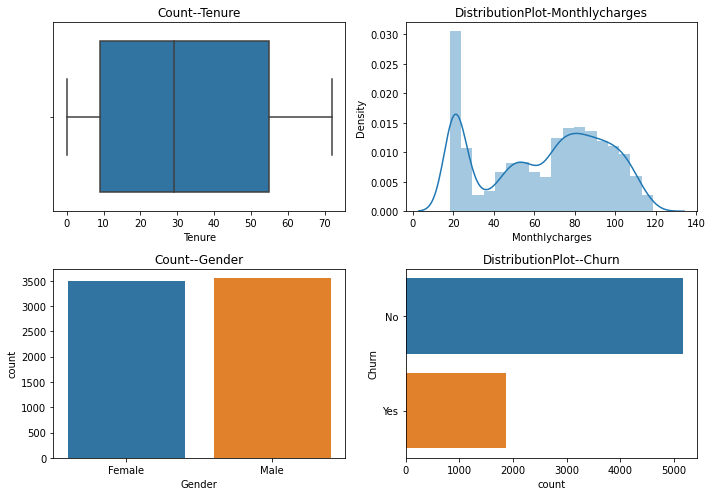

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,7))
axes[0,0].set_title('Count--Tenure')
axes[0,1].set_title('DistributionPlot-Monthlycharges')
axes[1,0].set_title('Count--Gender')
axes[1,1].set_title('DistributionPlot--Churn')


sn.boxplot(df.Tenure, orient='v',ax=axes[0,0])
sn.distplot(df.Monthlycharges,ax=axes[0,1]) 
sn.countplot(x ='Gender', data = df, ax=axes[1,0])
# sn.boxplot(df['Gender'], ax = axes[1,0])
sn.countplot(y ='Churn', data = df, orient='h',ax=axes[1,1])
fig.tight_layout();  # this reduces the space in between the subplots

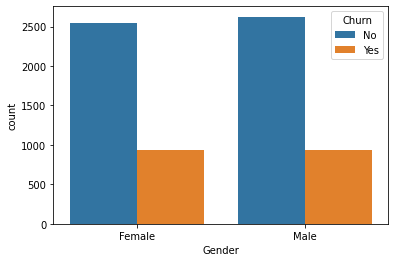

In [19]:
ax = sn.countplot(x="Gender", hue="Churn", data=df)

In [20]:
# tenure:
df.Tenure.describe()

count    7043.00
mean       32.37
std        24.56
min         0.00
25%         9.00
50%        29.00
75%        55.00
max        72.00
Name: Tenure, dtype: float64

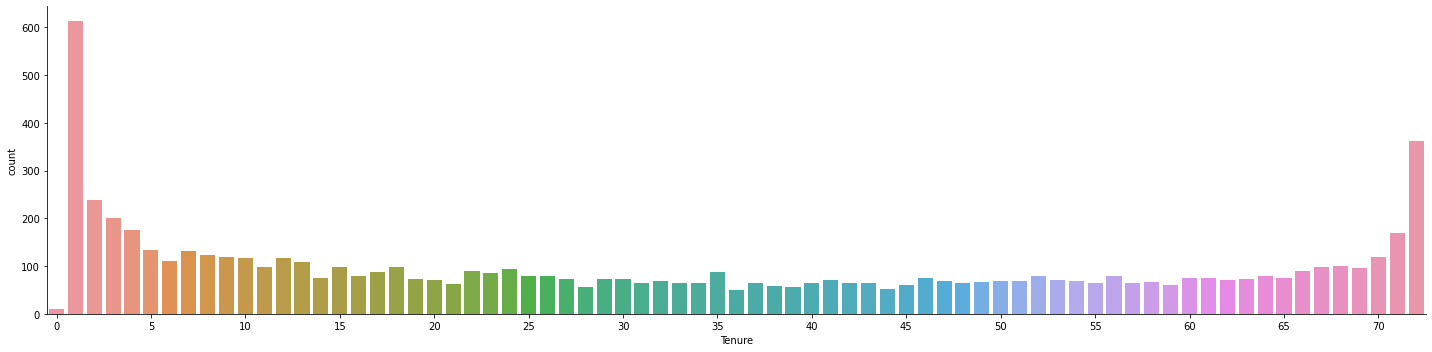

In [21]:
pl = sn.factorplot('Tenure',data=df, aspect=4,kind='count')
pl.set_xticklabels(step=5)

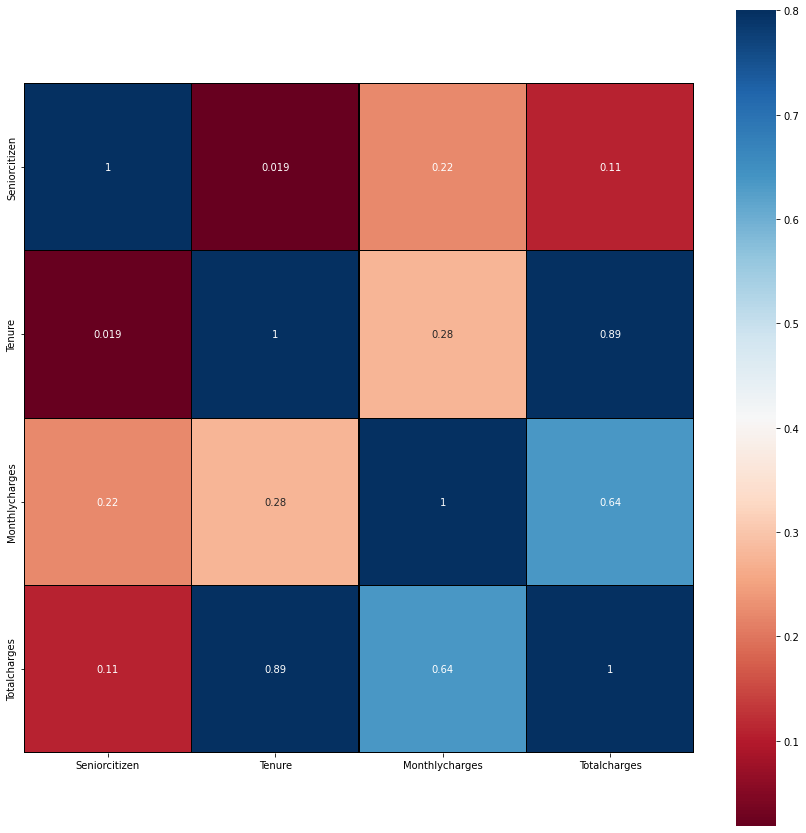

In [22]:
corr=df.corr(method='spearman')
plt.figure(figsize=(15,15))
sn.heatmap(corr,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='RdBu',linecolor='black')

In [23]:
# dependent and independent variable

x = df.drop(["Churn", "Customerid"], axis =1)
y = pd.DataFrame(df.iloc[:, -1])

In [24]:
df2 = x.copy()

In [25]:
# seperate categorical variables
# numerical_data = df2.select_dtypes(include=[np.number])
# categorical_data = df2.select_dtypes(exclude=[np.number])

In [26]:
# categorical_column_list = [column for column in categorical_data.columns]

In [27]:
# print(categorical_column_list)
# print(type(categorical_column_list))

In [28]:
# encode_categorical_data = pd.get_dummies(x)
x = pd.get_dummies(x, drop_first= True)
y = pd.get_dummies(y, drop_first=True)

In [29]:
x.shape

(7043, 30)

In [30]:
[x for x in x.columns]

['Seniorcitizen',
 'Tenure',
 'Monthlycharges',
 'Totalcharges',
 'Gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'Phoneservice_Yes',
 'Multiplelines_No phone service',
 'Multiplelines_Yes',
 'Internetservice_Fiber optic',
 'Internetservice_No',
 'Onlinesecurity_No internet service',
 'Onlinesecurity_Yes',
 'Onlinebackup_No internet service',
 'Onlinebackup_Yes',
 'Deviceprotection_No internet service',
 'Deviceprotection_Yes',
 'Techsupport_No internet service',
 'Techsupport_Yes',
 'Streamingtv_No internet service',
 'Streamingtv_Yes',
 'Streamingmovies_No internet service',
 'Streamingmovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'Paperlessbilling_Yes',
 'Paymentmethod_Credit card (automatic)',
 'Paymentmethod_Electronic check',
 'Paymentmethod_Mailed check']

In [31]:
x.columns[x.isna().any()]
x.Totalcharges = x.Totalcharges.fillna(x.Totalcharges.mean())

In [32]:
#train splip
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [33]:
print("The training dataset is {}.".format(X_train.shape))
print("The testing dataset is {}.".format(X_test.shape))
print("The y train dataset is {}.".format(y_train.shape))
print("The y test dataset is {}.".format(y_test.shape))

The training dataset is (5634, 30).
The testing dataset is (1409, 30).
The y train dataset is (5634, 1).
The y test dataset is (1409, 1).


In [34]:
result = pd.DataFrame(columns=["classifiers","accuracy_train", "accuracy_test","roc_train", "roc_test", "f1","precision", "recall"])
# df.loc[len(df.index)] = [str(clf), accuracy_train, accuracy_test, roc_train, roc_test, f1, precision,recall] 

In [35]:
df.Paymentmethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [36]:
def classifier(clf, x_train,x_test,y_train,y_test, df):
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)
    
    accuracy_test = accuracy_score(y_test,y_test_pred)
    accuracy_train =  accuracy_score(y_train,y_train_pred)
    
    roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
    roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')
    
    print('Train accuracy is:',accuracy_train )
    print('Test accuracy is:',accuracy_test )
    print('Train ROC is:', roc_train)
    print('Test ROC is:',roc_test )
    
    # Fscore, precision and recall on test data
    f1 = f1_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred) 
    print("F score is:",f1 )
    print("Precision is:",precision)
    print("Recall is:", recall)
    df.loc[len(df.index)] = [str(clf), accuracy_train, accuracy_test, roc_train, roc_test, f1, precision,recall] 
    return  y_train_pred ,  y_test_pred, df

# Draw ROC curve from training and test data probability
def draw_roc( train_actual, train_probs, test_actual, test_probs ):
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve( train_actual, train_probs,
                                              drop_intermediate = False )
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve( test_actual, test_probs,
                                              drop_intermediate = False )
    train_auc_score = metrics.roc_auc_score( train_actual, train_probs )
    test_auc_score = metrics.roc_auc_score( test_actual, test_probs )
    plt.figure(figsize=(5, 5))
    plt.plot( train_fpr, train_tpr, label='ROC curve (area = %0.2f)' % train_auc_score )
    plt.plot( test_fpr, test_tpr, label='ROC curve (area = %0.2f)' % test_auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

def prediction_model(model, x_test, y_test):
     
    predict = model.predict(x_test)
    accuracy = accuracy_score(y_test, predict)
    print(model.__class__.__name__+"\t = %0.3f " % accuracy)

In [37]:
# # Build model
# #import models

# from sklearn.model_selection import cross_val_score
# clf = GaussianNB()
# clf.fit(X_train, y_train)
# clf.score(X_test,y_test)

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

Train accuracy is: 0.8052893148739794
Test accuracy is: 0.794180269694819
Train ROC is: 0.7226124595055832
Test ROC is: 0.6982090276907655
F score is: 0.5579268292682926
Precision is: 0.6354166666666666
Recall is: 0.49728260869565216


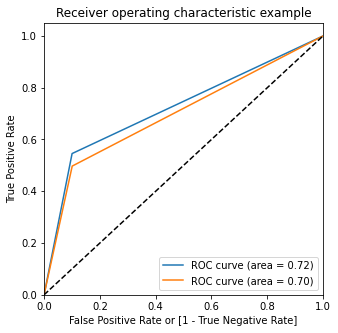

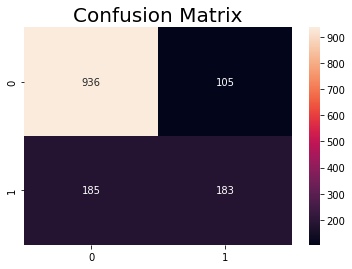

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', random_state = 100)
logreg = logreg.fit(X_train, y_train)
y_train_pred,y_test_pred, result = classifier(logreg, X_train, X_test, y_train, y_test, result)
draw_roc(y_train,y_train_pred,y_test,y_test_pred)

cf_matrix = confusion_matrix(y_test, y_test_pred )
sn.heatmap(cf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix", fontsize=20)
plt.show()

Train accuracy is: 0.6739439119630813
Test accuracy is: 0.6692689850958127
Train ROC is: 0.7344890485945897
Test ROC is: 0.730500563839118
F score is: 0.575591985428051
Precision is: 0.4328767123287671
Recall is: 0.8586956521739131


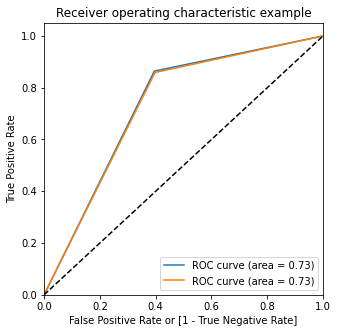

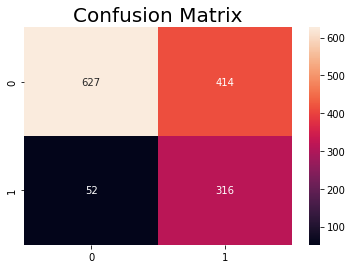

In [40]:
model = GaussianNB()
model.fit(X_train, y_train)
y_train_pred,y_test_pred, result = classifier(model, X_train, X_test, y_train, y_test, result)
draw_roc(y_train,y_train_pred,y_test,y_test_pred)

cf_matrix = confusion_matrix(y_test, y_test_pred )
sn.heatmap(cf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix", fontsize=20)
plt.show()

Train accuracy is: 0.997515086971956
Test accuracy is: 0.7785663591199432
Train ROC is: 0.997033512459554
Test ROC is: 0.6762232176418995
F score is: 0.5214723926380368
Precision is: 0.5985915492957746
Recall is: 0.46195652173913043


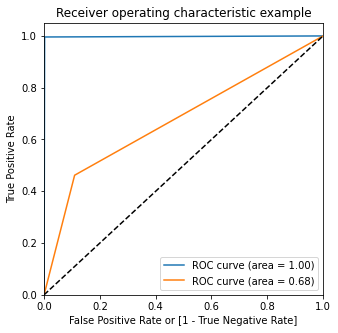

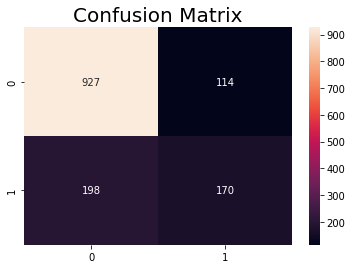

In [41]:
rforest = RandomForestClassifier(random_state=0)
rforest = rforest.fit(X_train, y_train)
y_train_pred,y_test_pred, result = classifier(rforest, X_train,X_test,y_train,y_test, result)
draw_roc(y_train,y_train_pred,y_test,y_test_pred)

cf_matrix = confusion_matrix(y_test, y_test_pred )
sn.heatmap(cf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix", fontsize=20)
plt.show()

Train accuracy is: 0.8237486687965921
Test accuracy is: 0.7920511000709723
Train ROC is: 0.7428309347119663
Test ROC is: 0.6976464937560038
F score is: 0.556732223903177
Precision is: 0.6279863481228669
Recall is: 0.5


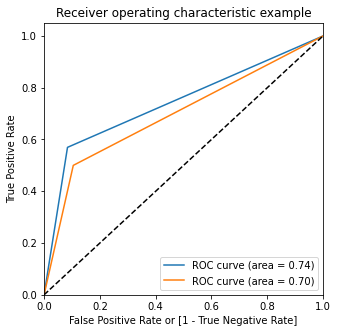

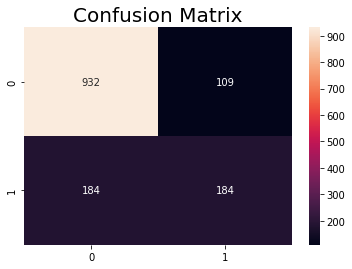

In [42]:
xgb_model = XGBClassifier(verbosity = 0)
xgb_model = xgb_model.fit(X_train, y_train)
y_train_pred,y_test_pred, result = classifier(xgb_model, X_train,X_test,y_train,y_test, result)
draw_roc(y_train,y_train_pred,y_test,y_test_pred)

cf_matrix = confusion_matrix(y_test, y_test_pred )
sn.heatmap(cf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix", fontsize=20)
plt.show()

In [43]:
for clf in (logreg, model, rforest, xgb_model):
    clf.fit(X_train, y_train)
    prediction_model(clf,X_test, y_test)

LogisticRegression	 = 0.794 
GaussianNB	 = 0.669 
RandomForestClassifier	 = 0.779 
XGBClassifier	 = 0.792 


## **Using SMOTE**

In [44]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33)

In [45]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

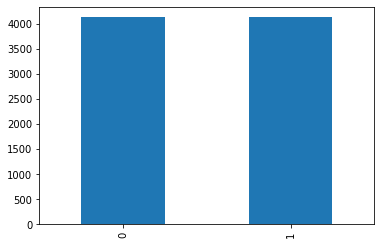

In [46]:
# now as you can see the data is balaced
y_train_res["Churn_Yes"].value_counts().plot.bar()

Train accuracy is: 0.8330510525042342
Test accuracy is: 0.7551454932576295
Train ROC is: 0.8330510525042343
Test ROC is: 0.7218602514304807
F score is: 0.5818181818181819
Precision is: 0.5251641137855579
Recall is: 0.6521739130434783


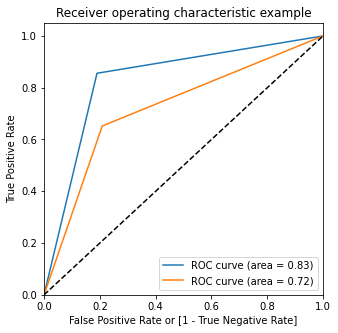

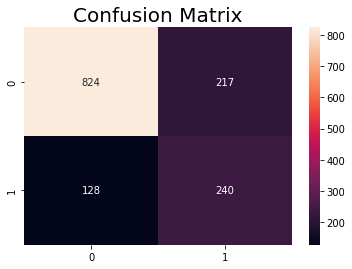

In [47]:
from sklearn.linear_model import LogisticRegression
logreg_sm = LogisticRegression(solver='lbfgs', random_state = 100)
logreg_sm = logreg_sm.fit(X_train_res, y_train_res)
y_train_pred,y_test_pred, result = classifier(logreg_sm, X_train_res, X_test, y_train_res, y_test, result)
draw_roc(y_train_res,y_train_pred,y_test,y_test_pred)

cf_matrix = confusion_matrix(y_test, y_test_pred )
sn.heatmap(cf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix", fontsize=20)
plt.show()

Train accuracy is: 0.7905879506411807
Test accuracy is: 0.7068843151171044
Train ROC is: 0.7905879506411808
Test ROC is: 0.726970043436495
F score is: 0.5781409601634321
Precision is: 0.46317512274959083
Recall is: 0.7690217391304348


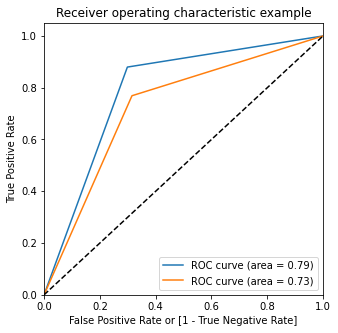

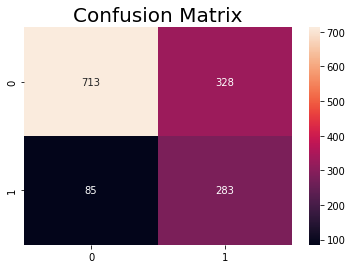

In [48]:
model_sm = GaussianNB()
model_sm.fit(X_train_res, y_train_res)
y_train_pred,y_test_pred, result = classifier(model_sm, X_train_res, X_test, y_train_res, y_test, result)
draw_roc(y_train_res,y_train_pred,y_test,y_test_pred)

cf_matrix = confusion_matrix(y_test, y_test_pred )
sn.heatmap(cf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix", fontsize=20)
plt.show()

Train accuracy is: 0.9981853375272199
Test accuracy is: 0.758694109297374
Train ROC is: 0.9981853375272198
Test ROC is: 0.6970317524955102
F score is: 0.5514511873350924
Precision is: 0.5358974358974359
Recall is: 0.5679347826086957


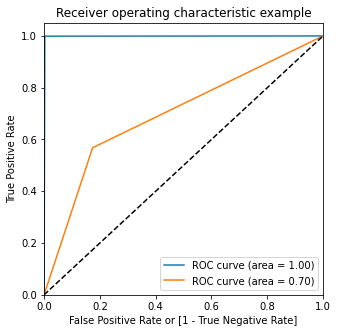

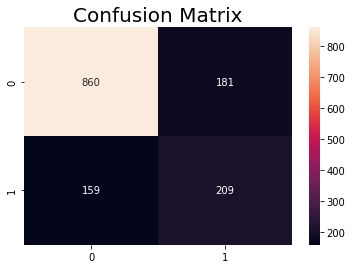

In [49]:
rforest_sm = RandomForestClassifier(random_state=0)
rforest_sm = rforest.fit(X_train_res, y_train_res)
y_train_pred,y_test_pred, result = classifier(rforest_sm, X_train_res,X_test,y_train_res,y_test, result)
draw_roc(y_train_res,y_train_pred,y_test,y_test_pred)

cf_matrix = confusion_matrix(y_test, y_test_pred )
sn.heatmap(cf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix", fontsize=20)
plt.show()

Train accuracy is: 0.8521654972175176
Test accuracy is: 0.7551454932576295
Train ROC is: 0.8521654972175174
Test ROC is: 0.7192250866641607
F score is: 0.5787545787545787
Precision is: 0.5254988913525499
Recall is: 0.6440217391304348


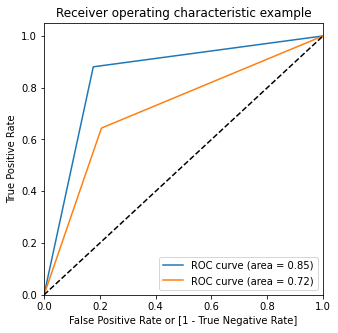

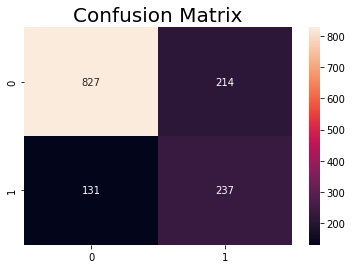

In [50]:
xgb_model_sm = XGBClassifier(verbosity = 0)
xgb_model_sm = xgb_model.fit(X_train_res, y_train_res)
y_train_pred,y_test_pred, result = classifier(xgb_model_sm, X_train_res,X_test,y_train_res,y_test, result)
draw_roc(y_train_res,y_train_pred,y_test,y_test_pred)

cf_matrix = confusion_matrix(y_test, y_test_pred )
sn.heatmap(cf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix", fontsize=20)
plt.show()

In [51]:
for clf in (logreg, model, rforest, xgb_model):
    clf.fit(X_train, y_train)
    prediction_model(clf,X_test, y_test)

LogisticRegression	 = 0.794 
GaussianNB	 = 0.669 
RandomForestClassifier	 = 0.779 
XGBClassifier	 = 0.792 


In [52]:
result

,classifiers,accuracy_train,accuracy_test,roc_train,roc_test,f1,precision,recall
0,LogisticRegression(random_state=100),0.81,0.79,0.72,0.70,0.56,0.64,0.50
1,GaussianNB(),0.67,0.67,0.73,0.73,0.58,0.43,0.86
2,RandomForestClassifier(random_state=0),1.00,0.78,1.00,0.68,0.52,0.60,0.46
3,XGBClassifier(verbosity=0),0.82,0.79,0.74,0.70,0.56,0.63,0.50
4,LogisticRegression(random_state=100),0.83,0.76,0.83,0.72,0.58,0.53,0.65
5,GaussianNB(),0.79,0.71,0.79,0.73,0.58,0.46,0.77
6,RandomForestClassifier(random_state=0),1.00,0.76,1.00,0.70,0.55,0.54,0.57
7,XGBClassifier(verbosity=0),0.85,0.76,0.85,0.72,0.58,0.53,0.64
